# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Read-ins" data-toc-modified-id="Read-ins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read-ins</a></div><div class="lev1 toc-item"><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></div><div class="lev1 toc-item"><a href="#Analysis-sbi" data-toc-modified-id="Analysis-sbi-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis sbi</a></div><div class="lev1 toc-item"><a href="#Analysis-rbi" data-toc-modified-id="Analysis-rbi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis rbi</a></div><div class="lev1 toc-item"><a href="#Analysis-shifts" data-toc-modified-id="Analysis-shifts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis shifts</a></div><div class="lev1 toc-item"><a href="#Compare-real-errors" data-toc-modified-id="Compare-real-errors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare real errors</a></div><div class="lev1 toc-item"><a href="#Compare-simulated-errors" data-toc-modified-id="Compare-simulated-errors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare simulated errors</a></div><div class="lev1 toc-item"><a href="#Compare-running-time" data-toc-modified-id="Compare-running-time-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Compare running time</a></div>

# Read-ins

In [1]:
import pandas as pd
import numpy as np
from math import floor
%matplotlib notebook
import matplotlib.pyplot as plt
import glob

In [2]:
mean_bis = [1.2, 5, 15, 25, 67.5, 90]
N_bis = len(mean_bis)
track_lengths = [500, 1000, 5000]

# Functions

In [3]:
def boxplot_part(ax, track_length, plot_dict):
    # boxplot with whiskers on 5th and 95th percentile
    bp = ax.boxplot([el[1] for el in plot_dict[track_length].items()], positions=list(np.arange(1,N_bis+1)), whis=[5, 95])
    plt.setp(bp['medians'], color='k')
    ax.set_xticks(list(np.arange(1,N_bis+1)))
    ax.set_xticklabels([str(bi)+'\n({})'.format(len(plot_dict[track_length][bi])) for bi in mean_bis])
    ax.set_title('N pos = '+str(track_length))
    return

# Analysis sbi

In [5]:
summary_sbi = pd.read_csv('results/summaries/sbi/summary_sbi_short_tracks.csv', names=["rep", "track_length", "pingType", "mean_bi", "dist", "mean_real", "mean_est", "nb_pos", "run_time"])

In [7]:
bi_groups_sbi = summary_sbi.groupby(by=['mean_bi','track_length'])

In [8]:
real_error_dicts = {}
for TL in track_lengths:
    real_error_dicts[TL] = {}
    for bi in mean_bis:
        real_error_dicts[TL][bi] = bi_groups_sbi.get_group((bi,TL)).mean_real.dropna()

NOTE: these figures show the outliers, which are not seen on the figures in the YAPS paper. Are outliers relevant? I personally think so, they correspond with these occurences of yaps tracks that completely misfit...

In [9]:
est_error_dicts = {}
for TL in track_lengths:
    est_error_dicts[TL] = {}
    for bi in mean_bis:
        est_error_dicts[TL][bi] = bi_groups_sbi.get_group((bi,TL)).mean_est.dropna()

In [10]:
run_time_dicts = {}
for TL in track_lengths:
    run_time_dicts[TL] = {}
    for bi in mean_bis:
        run_time_dicts[TL][bi] = bi_groups_sbi.get_group((bi,TL)).run_time.dropna()

# Analysis rbi

In [11]:
summary_rbi = pd.read_csv('results/summaries/rbi/summary_rbi_short_tracks.csv', names=["rep", "track_length", "pingType", "mean_bi", "dist", "mean_real", "mean_est", "nb_pos", "run_time"])

In [12]:
bi_groups_rbi = summary_rbi.groupby(by=['mean_bi','track_length'])

In [13]:
real_error_dicts_rbi = {}
for TL in track_lengths:
    real_error_dicts_rbi[TL] = {}
    for bi in mean_bis:
        real_error_dicts_rbi[TL][bi] = bi_groups_rbi.get_group((bi,TL)).mean_real.dropna()

In [14]:
est_error_dicts_rbi = {}
for TL in track_lengths:
    est_error_dicts_rbi[TL] = {}
    for bi in mean_bis:
        est_error_dicts_rbi[TL][bi] = bi_groups_rbi.get_group((bi,TL)).mean_est.dropna()

In [15]:
run_time_dicts_rbi = {}
for TL in track_lengths:
    run_time_dicts_rbi[TL] = {}
    for bi in mean_bis:
        run_time_dicts_rbi[TL][bi] = bi_groups_rbi.get_group((bi,TL)).run_time.dropna()

# Analysis shifts

In [16]:
summary_shifts_sbi = pd.read_csv('results/summaries/sbi/summary_shifts.csv', 
                                 names=["rep", "track_length", "pingType", "mean_bi", "shift", "mean_real", "mean_est", "nb_pos", "run_time"])

In [ ]:
#summary_shifts_sbi.groupby(by=['mean_bi','track_length']).count()

In [ ]:
#summary_shifts_sbi[(summary_shifts_sbi.mean_bi==1.2)&(summary_shifts_sbi.track_length==5000)]#(summary_shifts_sbi.rep.isin([2,7,21,30]))

In [ ]:
summary_shifts_sbi.groupby('track_length').mean()

In [ ]:
summary_shifts_rbi = pd.read_csv('results_short_tracks/summaries/rbi/summary_all_rbi.csv', 
                                 names=["rep", "track_length", "pingType", "mean_bi", "shift", "mean_real", "mean_est", "nb_pos", "run_time"])

In [ ]:
summary_shifts_rbi.groupby('track_length').max()

# Compare real errors

NOTE: these figures show the outliers, which are not seen on the figures in the YAPS paper. Are outliers relevant? I personally think so, they correspond with these occurences of yaps tracks that completely misfit...

<IPython.core.display.Javascript object>


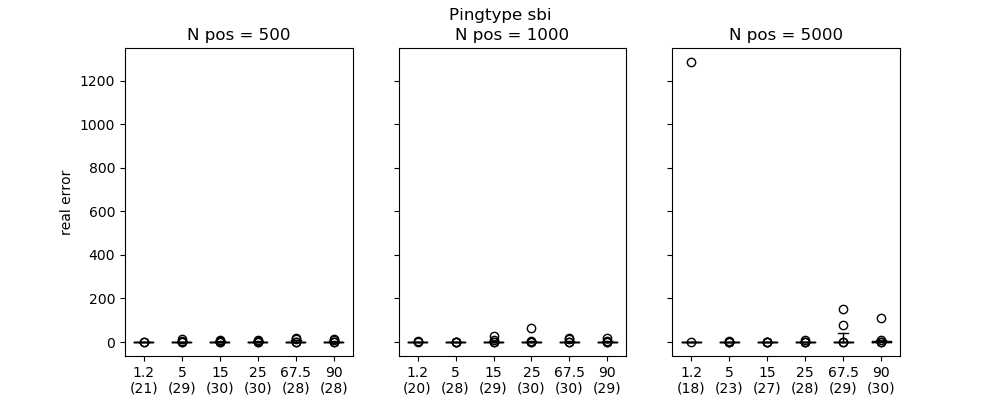

Text(0.5, 0.98, 'Pingtype sbi')

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, real_error_dicts)
boxplot_part(ax2, 1000, real_error_dicts)
boxplot_part(ax3, 5000, real_error_dicts)
ax1.set_ylabel('real error')
fig.suptitle('Pingtype sbi')

<IPython.core.display.Javascript object>


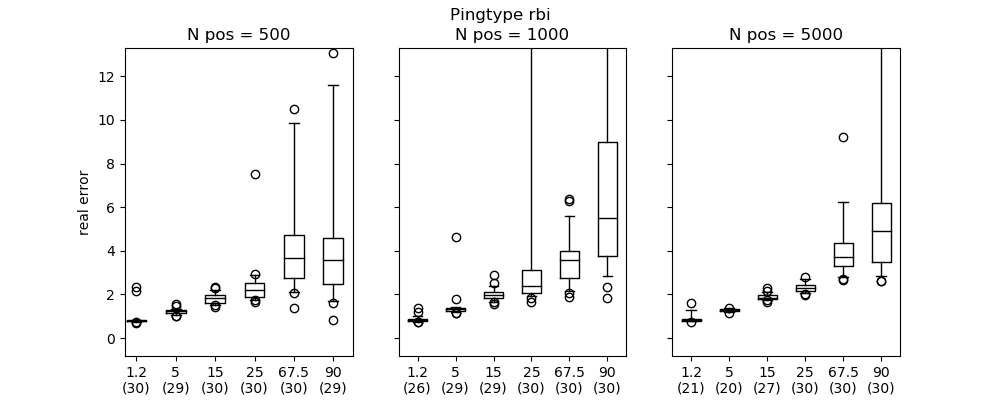

Text(0.5, 0.98, 'Pingtype rbi')

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, real_error_dicts_rbi)
boxplot_part(ax2, 1000, real_error_dicts_rbi)
boxplot_part(ax3, 5000, real_error_dicts_rbi)
ax1.set_ylabel('real error')
fig.suptitle('Pingtype rbi')

# Compare simulated errors

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, est_error_dicts)
boxplot_part(ax2, 1000, est_error_dicts)
boxplot_part(ax3, 5000, est_error_dicts)
ax1.set_ylabel('est error')
fig.suptitle('Pingtype sbi')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, est_error_dicts_rbi)
boxplot_part(ax2, 1000, est_error_dicts_rbi)
boxplot_part(ax3, 5000, est_error_dicts_rbi)
ax1.set_ylabel('est error')
fig.suptitle('Pingtype rbi')

# Compare running time

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, run_time_dicts)
boxplot_part(ax2, 1000, run_time_dicts)
boxplot_part(ax3, 5000, run_time_dicts)
ax1.set_ylabel('run time')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, run_time_dicts_rbi)
boxplot_part(ax2, 1000, run_time_dicts_rbi)
boxplot_part(ax3, 5000, run_time_dicts_rbi)
ax1.set_ylabel('run time')